In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import os
def getData(filename, dirname):
    file_dir = os.path.join('/kaggle/input', dirname)
    csv = os.path.join(file_dir, filename)
    return pd.read_csv(csv)

In [2]:
train_set = getData('train.csv', 'digit-recognizer')
test_set = getData('test.csv', 'digit-recognizer')

In [3]:
train_set.shape
x_train = np.array(train_set.drop("label", axis = 1)) / 255
y_train = np.array(train_set.label)
x_test = np.array(test_set)

In [4]:
x_train.shape
X = x_train.reshape(42000, 28, 28)
X.shape

(42000, 28, 28)

In [5]:
x_test.shape

(28000, 784)

In [6]:
X_test = x_test.reshape(28000, 28, 28)

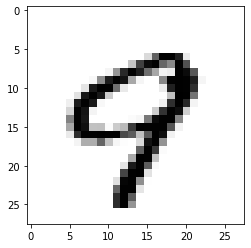

In [7]:
plt.imshow(X[100], cmap="Greys")

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(175, activation="relu"),
    tf.keras.layers.Dense(175, activation="relu"),
    tf.keras.layers.Dense(175, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
# a shape of [None, 28, 28] for a 28 x 28 image

2022-07-30 15:10:51.090987: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 175)               137375    
_________________________________________________________________
dense_1 (Dense)              (None, 175)               30800     
_________________________________________________________________
dense_2 (Dense)              (None, 175)               30800     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1760      
Total params: 200,735
Trainable params: 200,735
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_one_hot_train = tf.one_hot(y_train, 10)
# encoding , without it the model got a 10% accuracy
model.fit(X,y_one_hot_train, epochs=50, batch_size = 32)
#easy way to improve accuracy could be to explore removing some excess off the image, like the grey around the number which isn't needed

2022-07-30 15:10:51.801018: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0126 - accuracy: 0.9143
Epoch 2/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0059 - accuracy: 0.9611
Epoch 3/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0047 - accuracy: 0.9697
Epoch 4/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0040 - accuracy: 0.9742
Epoch 5/50
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0034 - accuracy: 0.9785
Epoch 6/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0031 - accuracy: 0.9805
Epoch 7/50
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0028 - accuracy: 0.9827
Epoch 8/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0028 - accuracy: 0.9828
Epoch 9/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.9843
Epoch 10/50
1313/1313 [==============================] - 5s 3ms/step - loss: 0.002

In [11]:
pred = model.predict(x_test)

In [12]:
new_pred = tf.math.argmax(pred, axis = -1)
sub = {'ImageId': test_set.index + 1, 'Label': new_pred}
basic_sub = pd.DataFrame(data=sub)
basic_sub.to_csv("submission.csv", index=False)
basic_sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
